<h1><center>Data Science Research </center></h1>


###                 1.0  Introduction

This report will investigate an exploratory data analysis on the data sets about the movies, their origin and their investment, provided by the IMDB in order to create a possible recommendation that can lead to profitable investment.

The analysis is based on 3 aspects, the General Exploratory data analysis of the whole IMDB data with detailed example of tests, the hypothesis and their tests followed by a summary of the possible outcome for the investors. All the tests and analyses will be outlined and discussed while also taking into consideration the minimum budget set for this analysis which is 1.500.000



### 2.0 General Explaratory of Data

As mentioned before the exploratory data analysis is based on the IMDB data, the IMDB data has 28 variables(columns) such as, color, duration, IMDB_score etc. all of the rows within the IMDB data are unique to every movie, each column within the same row gives specific information about only one movie.

Please follow below the example of how I import the IMDB data and display the first 5 rows.



#### 2.1 Reading the data

In [28]:
#importing the libraries 
from scipy import stats
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

myfile = 'movie_metadata.csv'

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=None)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


It appears that the 28 variables are very different and indicate various information about the movie within the same row. Let’s check the examples of columns and see if we can find any correlations that can give the idea what can be profitable as a fact.

#### 2.2 Exploring the countries column

Let’s see if any of these movies can really differ based on the fact that they were made in different countries.



In [29]:
# creting a seperate dataFrame by taking values from IMDB 
# and comparing them by grosss and IMDB scores
mostCountries = df.loc[:,['country','imdb_score','gross']]
mostCountries

,country,imdb_score,gross
0,USA,7.9,760505847.0
1,USA,7.1,309404152.0
2,UK,6.8,200074175.0
3,USA,8.5,448130642.0
4,NaN,7.1,NaN
...,...,...,...
5038,Canada,7.7,NaN
5039,USA,7.5,NaN
5040,USA,6.3,NaN
5041,USA,6.3,10443.0


####  2.3 Nan values

We found out that there are around 5043 movies in the IMDB dataframe however it looks like there are examples of movies that can have NaN values on the columns that indicate the countries where they were made and the gross they had. e.g. check id 4 from the output above.

It is preferred that we do not have any NaN values to avoid miscalculations when evaluating the mean. Therefore, when creating separate dataframes for each column the rows with the nan values within this different datarames would be excluded when it is necessary and reasonable.
Now let’s see if there is a possibility that the movies really differ based on countries they originate.


In [30]:
# creating a new dataframe with most countries and checking the ones that have USA
mostCountries = df.loc[:,['country','budget','gross']]
mostCountries[(mostCountries['country'] == 'USA')]

,country,budget,gross
0,USA,237000000.0,760505847.0
1,USA,300000000.0,309404152.0
3,USA,250000000.0,448130642.0
5,USA,263700000.0,73058679.0
6,USA,258000000.0,336530303.0
...,...,...,...
5037,USA,9000.0,4584.0
5039,USA,NaN,NaN
5040,USA,1400.0,NaN
5041,USA,NaN,10443.0


Evaluation shows that based on the data provided by IMDB the 3807 movies out of 5043 are made in the USA. this will be taken into consideration in the following test if need be.

### 3.0 Exploratory Data Analysis


Basic example of data exploration can be checking the IMDB_score, budget and gross for every movie by grouping them by genres

Here I sort the mean IMDB_score along with the gross and budget across films by genre. Set a minimum IMDB_score and filter according to that. We are interested only in high scores, so we are only looking at films with good ratings.



In [31]:
# grouping srries of gangre is seperate datafram
genreseries=df.groupby('genres')['imdb_score','budget','gross'].mean()
#set the minimum imdb score that I care about to 8
min_imdb_score=8 
top_rated_genre = genreseries[genreseries['imdb_score']>min_imdb_score]
top_rated_genre = top_rated_genre.sort_values('imdb_score', ascending=False)
#print the 5 top genres for inspection
top_rated_genre.head()

,imdb_score,budget,gross
genres,,,
Action|Adventure|Crime|Drama|Sci-Fi|Thriller,8.8,NaN,NaN
Action|Adventure|Biography|Drama|History,8.6,NaN,NaN
Action|Drama|History|Thriller|War,8.5,4400000.0,NaN
Adventure|Animation|Drama|Family|Musical,8.5,45000000.0,422783777.0
Crime|Drama|Fantasy|Mystery,8.5,60000000.0,136801374.0


#### 3.1 Exploring the genres

From the Dataframe above we can see that the Action|Adventure|Crime|Drama|Sci-Fi|Thriller have the highest IMDB_score however it is not known whether they had the most profit. Therefore, I have started checking the rest of the columns to see if I can find any correlations.

There appears to be some well-rated genres that we could propose as better options to make a film. To examine if any of these good film genres can be made within our budget, I filtered by a maximum 1 500 000 – budget and checked the gross return. then sort them based on the movies that have the least budget. Please follow the example below.

In [43]:
#set the maximum possible budget to 1 500 000
max_budget = 1500000
topgenreseries=df.groupby('genres')['imdb_score','budget','gross'].mean()

#find the details of films with less than the maximum budget
budget_genres = topgenreseries[topgenreseries['budget']<max_budget]
budget_genres = budget_genres.sort_values('imdb_score',ascending=False)
#sort in ascending order by the 1 column which is the gross
budget_genres.sort_values('gross').head()

,imdb_score,budget,gross
genres,,,
Adventure|Documentary,7.0,150000.0,4914.0
Comedy|Fantasy|Thriller,6.4,900000.0,6643.0
Comedy|Fantasy|Horror|Musical,4.7,100000.0,11798.0
Drama|Fantasy|Sci-Fi,5.6,825000.0,15278.0
Action|Biography|Documentary|Sport,6.8,500000.0,21199.0


It seems like the ‘gross’ and the ‘IMDB_score’ can vary even if it was on the low budget so I will focus on finding the genres that have profited the most. The Adventure|Documentary and Comedy|Fantasy|Thriller genres seem to be well-rated and within our budget. in the following tests I will check all the correlations of the genres along with other possible variables to find any frequencies that prove this point.



To minimize the search, I will create a separate dataframe that only includes the profited movies, to do it I will take only the movies where the gross was higher than their budget. and also, minimize the budget to my maximum budget which is 1500000

In [44]:
# create a datafram with all the profted movies 
AllProfitedMovies = df[(df['gross'] > df['budget']) & (df['budget'] <= max_budget) ]
AllProfitedMovies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2242,Black and White,Alfred Hitchcock,290.0,108.0,13000.0,285.0,Vera Miles,606.0,32000000.0,Horror|Mystery|Thriller,...,1040.0,English,USA,R,806947.0,1960.0,332.0,8.5,1.85,18000
2420,Color,John Carpenter,212.0,89.0,0.0,606.0,Hal Holbrook,2000.0,21378000.0,Fantasy|Horror,...,335.0,English,USA,R,1000000.0,1980.0,826.0,6.8,2.35,7000
2492,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,1191.0,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000
2619,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,1191.0,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000
3278,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,826.0,English,USA,R,83532.0,1974.0,371.0,7.5,1.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,35.0,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


There are 155 movies that have had a profit. Although, it is not clear on how much they have profited yet, I will show the differences between the gross and budget to see the movies that profited most. and drop the Nan values so that in the end it is easier to calculate the mean.

In [45]:
# overwrite the data frame with new coulmn that has the exact amount they have profited
AllProfitedMovies['profit'] = AllProfitedMovies['gross'] - AllProfitedMovies['budget']
# display without nan values
AllProfitedMovies.dropna()

c:\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
2242,Black and White,Alfred Hitchcock,290.0,108.0,13000.0,285.0,Vera Miles,606.0,32000000.0,Horror|Mystery|Thriller,...,English,USA,R,806947.0,1960.0,332.0,8.5,1.85,18000,31193053.0
2420,Color,John Carpenter,212.0,89.0,0.0,606.0,Hal Holbrook,2000.0,21378000.0,Fantasy|Horror,...,English,USA,R,1000000.0,1980.0,826.0,6.8,2.35,7000,20378000.0
2492,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000,46700000.0
2619,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000,46700000.0
3278,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,English,USA,R,83532.0,1974.0,371.0,7.5,1.85,0,30775468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171,131507.0
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697,663780.0
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,417760.0
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0


Now we have 137 profited movies that have used the same or less amount of our MaxBudget. Now let’s see if there is any correlation along with genres by checking most frequent genres among the profited ones and display the top 5 genres.

In [46]:
#show the frequency of the genres among the profited movies
AllProfitedMovies['genres'].value_counts().head()

Drama                   17
Comedy|Drama|Romance    14
Comedy|Drama            12
Documentary              7
Drama|Romance            6
Name: genres, dtype: int64

#### 3.2 checking the proportion of the profit for each ganre

Now we will check each of these ganres individually sum their profit and compare the ourcome with each other.

In [47]:
# create a seperate dataframe for each of these ganres
# select their ganres

ProfitedDrama = AllProfitedMovies[AllProfitedMovies['genres']=='Drama']
ProfitedComedyDraRo = AllProfitedMovies[AllProfitedMovies['genres']=='Comedy|Drama|Romance']
ProfitedComedyDra = AllProfitedMovies[AllProfitedMovies['genres']=='Comedy|Drama']
ProfitedDocumentary = AllProfitedMovies[AllProfitedMovies['genres']=='Documentary']
ProfitedDramaRomance = AllProfitedMovies[AllProfitedMovies['genres']=='Drama|Romance']


In [48]:
# since each of them is a seperate dataframe sum their column of profit 
# save in different variables named after their categories of ganres

Drama = ProfitedDrama['profit'].sum(axis = 0, skipna = True)
ComedyDraRo = ProfitedComedyDraRo['profit'].sum(axis = 0, skipna = True)
ComedyDra = ProfitedComedyDra['profit'].sum(axis = 0, skipna = True)
Documentary = ProfitedDocumentary['profit'].sum(axis = 0, skipna = True)
DramaRomance = ProfitedDramaRomance['profit'].sum(axis = 0, skipna = True)


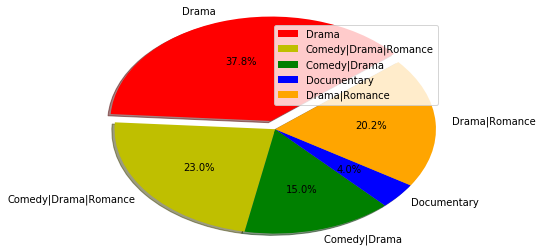

In [49]:

# defining labels 
activities = ['Drama', 'Comedy|Drama|Romance', 'Comedy|Drama ', 'Documentary','Drama|Romance'] 
  
# portion covered by each label 
slices = [Drama, ComedyDraRo, ComedyDra, Documentary, DramaRomance] 
  
# color for each label 
colors = ['r', 'y', 'g', 'b', 'orange'] 
  
# plotting the pie chart 
plt.pie(slices, labels = activities, colors=colors,  
        startangle=40, shadow = True, explode = (0.1, 0, 0, 0, 0), 
        radius = 1.2, autopct = '%1.1f%%') 
  
# plotting legend 
plt.legend() 
  
# showing the plot 
plt.show() 

Drama and comedy|Drama have the highest proportion of genres among the profited movies that we found, and we have the highest profit among them check the graph. now we want to find out whether difference is Signiant difference between the two highest most frequent genres and their mean profit to prove that the genre with the highest frequency does not have the most profit compared to the rest, to do it I will do the hypothesis testing below.

### 4.0 Hypothesis testing 

So, my general hypothesis is whether the genre 'Drama' has scientifically greater profit in comparison with second most frequent genre ‘Comedy|Drama’.

*	H0: my null hypothesis is that there is not signifcant differenc ebetween the mean profit of the two most frequent genres. μ1 - μ2 = 0
*	Ha: the alternative hypothesis is that there is significant difference, μ1 - μ2 > 0
*	Significance value α: 0.05


In [39]:
#calculate the mean Standard deviation and Freq in 3 seperate variables
DramMean = ProfitedDrama['profit'].mean()

DramaStd = ProfitedDrama['profit'].std()

DramaFreq = ProfitedDrama['profit'].count()



In [40]:
#calculate the mean Standard deviation and Freq in 3 seperate variables

ComedyDramMean = ProfitedComedyDraRo['profit'].mean()

ComedyDramStd = ProfitedComedyDraRo['profit'].std()

ComedyDramFreq = ProfitedComedyDraRo['profit'].count()

In [41]:
#caluculate the t testing using the variables created above
combinederror=(((DramaStd**2)/DramaFreq)+((ComedyDramStd**2)/ComedyDramFreq))**0.5   
t=(DramMean-ComedyDramMean)/combinederror

#### 4.1 finding the p value

In [50]:
# using stats library calulate the p value 
p_value_from_normal_for_diff = (1-stats.norm.cdf(t))
print ('one_tail mean profit difference between Drama and Comedy|Drama: ', p_value_from_normal_for_diff)

one_tail mean profit difference between Drama and Comedy|Drama:  0.2809780072042001


since our p value is greater than our alpha (significance value) we cannot reject the null hypothesis therefore the alternative hypothesis cannot be accepted. For the final evaluation we propose the Drama genre is the right proportion to propose as an option to invest in the movie production.

### 5.0 Summary

Based on the resulting tests and analyses, the outcome it is profitable to invest in movie production when comes to genre ‘Drama’. Even though, the second most profitable proportion of the data was for genre ‘Comedy|Drama’ it is still is part of Drama. 

Further analyses could help to summarize the affect of higher budget on the different example of to see the possibility of the change in genres in their proportion and change in profit, that would lead to the possibility on investigating different type of variables and their affects such as IMDB_score and the types of columns that provide the reviews. However, it was still possible to come up with an outcome give low budget of 1500000.